## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [5]:
from sklearn import preprocessing

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
        x=preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model=build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [20]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.55,0.15]
            
            

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with Momentum = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

50000/50000 [==============================] - 8s 167us/step - loss: 0.0875 - accuracy: 0.9706 - val_loss: 4.0717 - val_accuracy: 0.5329
Epoch 49/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.0773 - accuracy: 0.9744 - val_loss: 4.0572 - val_accuracy: 0.5298
Epoch 50/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.0700 - accuracy: 0.9764 - val_loss: 4.1867 - val_accuracy: 0.5310
Experiment with Momentum = 0.550000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________

Epoch 46/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.3031 - accuracy: 0.9096 - val_loss: 2.1074 - val_accuracy: 0.4991
Epoch 47/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.3061 - accuracy: 0.9114 - val_loss: 2.0188 - val_accuracy: 0.5080
Epoch 48/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.2631 - accuracy: 0.9240 - val_loss: 2.4454 - val_accuracy: 0.4823
Epoch 49/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.3082 - accuracy: 0.9171 - val_loss: 2.0710 - val_accuracy: 0.5115
Epoch 50/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.2197 - accuracy: 0.9397 - val_loss: 2.0882 - val_accuracy: 0.5190
Experiment with Momentum = 0.150000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____

50000/50000 [==============================] - 8s 164us/step - loss: 0.7054 - accuracy: 0.7647 - val_loss: 1.5329 - val_accuracy: 0.5115
Epoch 44/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.6947 - accuracy: 0.7704 - val_loss: 1.5505 - val_accuracy: 0.5107
Epoch 45/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.6742 - accuracy: 0.7765 - val_loss: 1.5129 - val_accuracy: 0.5192
Epoch 46/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.6672 - accuracy: 0.7789 - val_loss: 1.5428 - val_accuracy: 0.5215
Epoch 47/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.6523 - accuracy: 0.7843 - val_loss: 1.6291 - val_accuracy: 0.5076
Epoch 48/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.6291 - accuracy: 0.7944 - val_loss: 1.5776 - val_accuracy: 0.5080
Epoch 49/50
50000/50000 [==============================] - 8s 170us/step - loss: 0.6221 - accuracy: 0.7993 - val_loss:

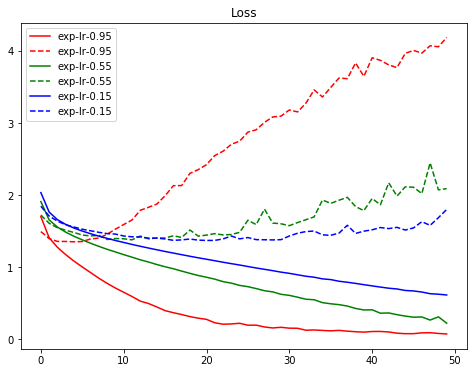

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()


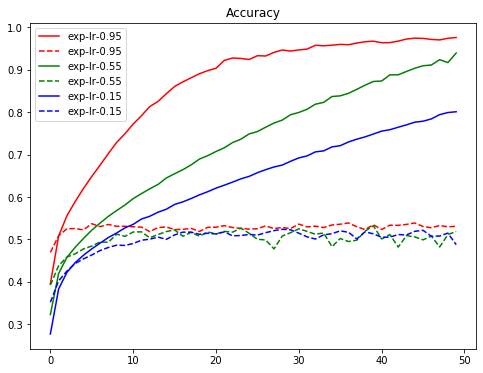

In [23]:

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [24]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.0663 - accuracy: 0.9781 - val_loss: 4.2218 - val_accuracy: 0.5313
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.0805 - accuracy: 0.9725 - val_loss: 4.2614 - val_accuracy: 0.5269
Experiment with LR = 0.550000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.2425 - accuracy: 0.9297 - val_loss: 2.1925 - val_accuracy: 0.5115
Epoch 48/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.2468 - accuracy: 0.9285 - val_loss: 2.1132 - val_accuracy: 0.5188
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.2139 - accuracy: 0.9411 - val_loss: 2.2138 - val_accuracy: 0.5023
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.1998 - accuracy: 0.9455 - val_loss: 2.2008 - val_accuracy: 0.5253
Experiment with LR = 0.150000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.6887 - accuracy: 0.7720 - val_loss: 1.4904 - val_accuracy: 0.5197
Epoch 46/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.6713 - accuracy: 0.7780 - val_loss: 1.6009 - val_accuracy: 0.5038
Epoch 47/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.6690 - accuracy: 0.7787 - val_loss: 1.5323 - val_accuracy: 0.5233
Epoch 48/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.6432 - accuracy: 0.7891 - val_loss: 1.9738 - val_accuracy: 0.4686
Epoch 49/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.6424 - accuracy: 0.7892 - val_loss: 1.5646 - val_accuracy: 0.5208
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.6102 - accuracy: 0.8008 - val_loss: 1.9762 - val_accuracy: 0.4691


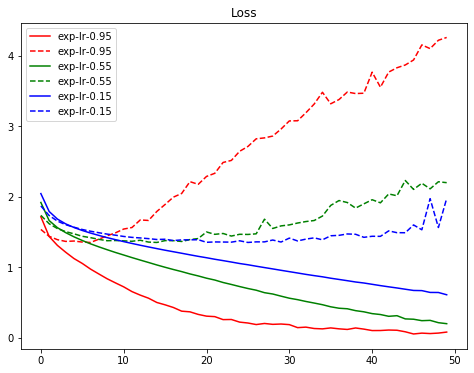

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()



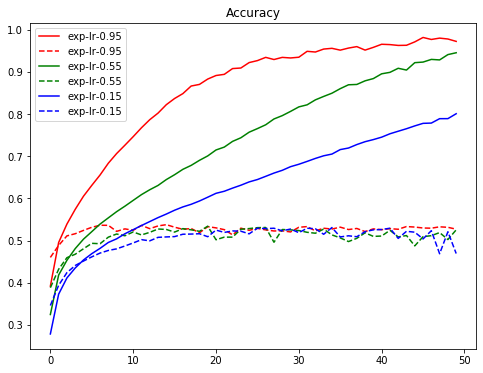

In [26]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

不同的momentum 會有不同的收斂速率。momentum越大,收斂越快。

In [ ]:
nesterov 減少了accuracy的震盪。